In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style("ticks")

## Compare tip attributes

Count the number of tips present at non-zero frequency in the "no delay" analysis compared to the number of tips with "ideal" and "realistic" delays. Additionally, compare the frequencies of tips that are present in the latter two analyses with the "no delay" analysis.

In [4]:
no_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_no_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [5]:
ideal_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_ideal_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [6]:
realistic_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_realistic_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [7]:
no_delay_tips.head()

,strain,timepoint,frequency
0,sample_3220_20,2016-10-01,0.00001
1,sample_3220_67,2016-10-01,0.00001
2,sample_3220_69,2016-10-01,0.00001
3,sample_3220_77,2016-10-01,0.00001
4,sample_3220_80,2016-10-01,0.00001


In [8]:
tips = no_delay_tips.merge(
    ideal_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_ideal"],
).merge(
    realistic_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_realistic"],
)  

In [9]:
tips.head(10)

,strain,timepoint,frequency,frequency_ideal,frequency_realistic
0,sample_3220_20,2016-10-01,0.000010,0.000018,0.000042
1,sample_3220_67,2016-10-01,0.000010,0.000018,0.000042
2,sample_3220_69,2016-10-01,0.000010,0.000018,0.000042
3,sample_3220_77,2016-10-01,0.000010,0.000018,0.000042
4,sample_3220_80,2016-10-01,0.000010,0.000018,NaN
5,sample_3224_25,2016-10-01,0.000016,0.000028,0.000066
6,sample_3224_38,2016-10-01,0.000016,0.000028,0.000066
7,sample_3224_67,2016-10-01,0.000016,0.000028,0.000066
8,sample_3224_92,2016-10-01,0.000016,0.000028,NaN
9,sample_3228_12,2016-10-01,0.000024,0.000044,0.000103


In [10]:
total_tips_no_delay = sum(~pd.isnull(tips["frequency"]))

In [11]:
total_tips_no_delay

7840

In [12]:
total_tips_ideal_delay = sum(~pd.isnull(tips["frequency_ideal"]))

In [13]:
total_tips_ideal_delay

6592

In [14]:
total_tips_ideal_delay / total_tips_no_delay

0.8408163265306122

In [15]:
total_tips_realistic_delay = sum(~pd.isnull(tips["frequency_realistic"]))

In [16]:
total_tips_realistic_delay

4659

In [17]:
total_tips_realistic_delay / total_tips_no_delay

0.5942602040816326

In [18]:
tips = tips.fillna(0.0)

In [26]:
max_frequency = tips.loc[:, ["frequency", "frequency_ideal", "frequency_realistic"]].max().max()

In [27]:
max_frequency_threshold = max_frequency + (max_frequency / 10)

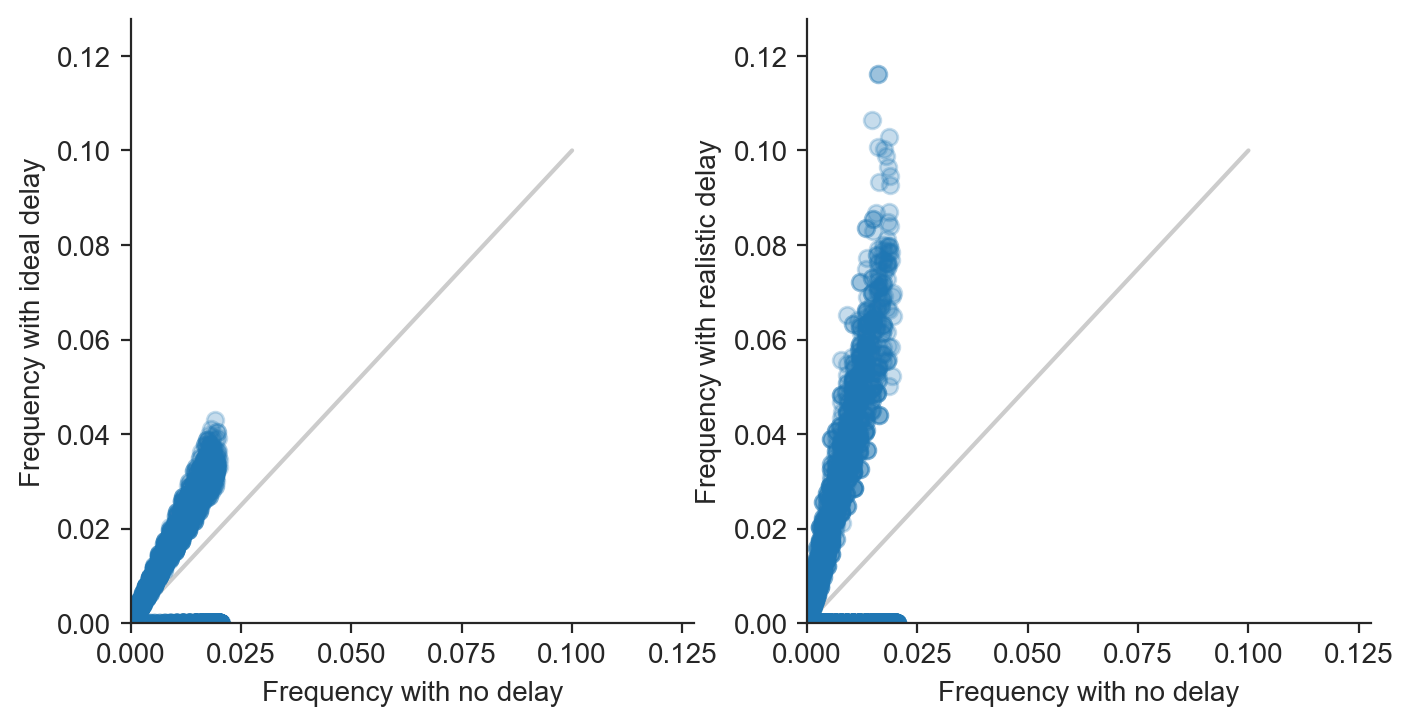

In [30]:
fig, all_axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
axes = all_axes.flatten()

axes[0].plot(
    tips["frequency"],
    tips["frequency_ideal"],
    "o",
    alpha=0.25,
)

axes[0].plot(
    np.arange(0, max_frequency_threshold, 0.1),
    np.arange(0, max_frequency_threshold, 0.1),
    color="#CCCCCC",
    zorder=-10,
)
axes[0].set_xlim(0, max_frequency_threshold)
axes[0].set_ylim(0, max_frequency_threshold)

axes[0].set_xlabel("Frequency with no delay")
axes[0].set_ylabel("Frequency with ideal delay")

axes[1].plot(
    tips["frequency"],
    tips["frequency_realistic"],
    "o",
    alpha=0.25,
)

axes[1].plot(
    np.arange(0, max_frequency_threshold, 0.1),
    np.arange(0, max_frequency_threshold, 0.1),
    color="#CCCCCC",
    zorder=-10,
)
axes[1].set_xlim(0, max_frequency_threshold)
axes[1].set_ylim(0, max_frequency_threshold)

axes[1].set_xlabel("Frequency with no delay")
axes[1].set_ylabel("Frequency with realistic delay")

sns.despine()

## Compare distances

Compare the model distances between the estimated and observed future populations when the estimated populations depend on different data delay conditions. We expect that the "no delay" scenario will be closer to the true future on average followed by the "ideal" and then the "realistic" conditions.

In [3]:
distances = pd.read_csv("../results/distance_model_errors.tsv", sep="\t", parse_dates=["validation_timepoint"])

In [4]:
distances = distances.rename(columns={"validation_timepoint": "timepoint"})

In [6]:
sample_to_delay_type = {
    "simulated_no_delay": "none",
    "simulated_ideal_delay": "ideal",
    "simulated_realistic_delay": "realistic",
    "simulated_no_delay_with_bias": "none",
    "simulated_ideal_delay_with_bias": "ideal",
    "simulated_realistic_delay_with_bias": "realistic",
    "h3n2_no_delay": "none",
    "h3n2_ideal_delay": "ideal",
    "h3n2_realistic_delay": "realistic",
    "h3n2_observed_delay": "observed",
}

In [7]:
distances["delay_type"] = distances["sample"].map(sample_to_delay_type)

In [7]:
distances.loc[:, ["timepoint", "future_timepoint", "delta_month"]].query("future_timepoint < '2020-10-01'").head(20)

,timepoint,future_timepoint,delta_month
0,2016-10-01,2017-01-01,3
1,2017-01-01,2017-04-01,3
2,2017-04-01,2017-07-01,3
3,2017-07-01,2017-10-01,3
4,2017-10-01,2018-01-01,3
5,2018-01-01,2018-04-01,3
6,2018-04-01,2018-07-01,3
7,2018-07-01,2018-10-01,3
8,2018-10-01,2019-01-01,3
9,2019-01-01,2019-04-01,3


In [8]:
distances["sample"].drop_duplicates()

0              simulated_no_delay_with_bias
378     simulated_realistic_delay_with_bias
756         simulated_ideal_delay_with_bias
1134                          h3n2_no_delay
1264                    h3n2_observed_delay
1394                       h3n2_ideal_delay
Name: sample, dtype: object

In [9]:
distances

,delta_month,error_type,future_timepoint,null_validation_error,optimal_validation_error,predictors,sample,type,validation_error,validation_n,timepoint,delay_type
0,3,test,2017-01-01,5.688202,2.466259,normalized_fitness,simulated_no_delay_with_bias,simulated,4.276237,160,2016-10-01,none
1,3,test,2017-04-01,6.082121,2.054727,normalized_fitness,simulated_no_delay_with_bias,simulated,3.705271,155,2017-01-01,none
2,3,test,2017-07-01,4.894526,2.221259,normalized_fitness,simulated_no_delay_with_bias,simulated,3.643320,160,2017-04-01,none
3,3,test,2017-10-01,4.838467,2.294631,normalized_fitness,simulated_no_delay_with_bias,simulated,4.336533,155,2017-07-01,none
4,3,test,2018-01-01,4.857177,2.311562,normalized_fitness,simulated_no_delay_with_bias,simulated,3.551471,160,2017-10-01,none
...,...,...,...,...,...,...,...,...,...,...,...,...
2215,12,test,2018-10-01,5.532204,2.060412,ne_star-lbi,h3n2_ideal_delay,natural,4.888068,818,2017-10-01,ideal
2216,12,test,2019-01-01,6.810789,2.313208,ne_star-lbi,h3n2_ideal_delay,natural,4.292469,892,2018-01-01,ideal
2217,12,test,2019-04-01,9.153819,2.543428,ne_star-lbi,h3n2_ideal_delay,natural,11.288205,1014,2018-04-01,ideal
2218,12,test,2019-07-01,10.153497,3.403382,ne_star-lbi,h3n2_ideal_delay,natural,13.844652,926,2018-07-01,ideal


In [10]:
distances.loc[:, ["timepoint", "delta_month", "sample", "validation_error"]]

,timepoint,delta_month,sample,validation_error
0,2016-10-01,3,simulated_no_delay_with_bias,4.276237
1,2017-01-01,3,simulated_no_delay_with_bias,3.705271
2,2017-04-01,3,simulated_no_delay_with_bias,3.643320
3,2017-07-01,3,simulated_no_delay_with_bias,4.336533
4,2017-10-01,3,simulated_no_delay_with_bias,3.551471
...,...,...,...,...
2215,2017-10-01,12,h3n2_ideal_delay,4.888068
2216,2018-01-01,12,h3n2_ideal_delay,4.292469
2217,2018-04-01,12,h3n2_ideal_delay,11.288205
2218,2018-07-01,12,h3n2_ideal_delay,13.844652


In [9]:
distances.groupby(["sample" ,"delay_type", "delta_month"])["validation_error"].mean()

sample                               delay_type  delta_month
h3n2_ideal_delay                     ideal       3              2.926006
                                                 6              4.356695
                                                 9              5.476440
                                                 12             6.424904
h3n2_no_delay                        none        3              2.857263
                                                 6              4.266039
                                                 9              5.450172
                                                 12             6.435586
h3n2_observed_delay                  observed    3              3.371311
                                                 6              4.643289
                                                 9              5.612443
                                                 12             6.482240
simulated_ideal_delay_with_bias      ideal       3             

In [10]:
distances.groupby(["sample", "delay_type", "delta_month"])["validation_error"].median().sort_values()

sample                               delay_type  delta_month
h3n2_no_delay                        none        3              2.675545
h3n2_ideal_delay                     ideal       3              2.699802
h3n2_observed_delay                  observed    3              3.076118
h3n2_ideal_delay                     ideal       6              3.810567
h3n2_no_delay                        none        6              3.880371
simulated_no_delay_with_bias         none        3              4.244008
h3n2_observed_delay                  observed    6              4.376981
h3n2_no_delay                        none        9              4.704521
h3n2_ideal_delay                     ideal       9              4.928092
simulated_ideal_delay_with_bias      ideal       3              4.976115
h3n2_observed_delay                  observed    9              5.145858
simulated_no_delay_with_bias         none        6              5.332915
h3n2_ideal_delay                     ideal       12            

## Simulated populations

In [16]:
simulated_distances = distances[distances["sample"].str.contains("simulated")].copy()

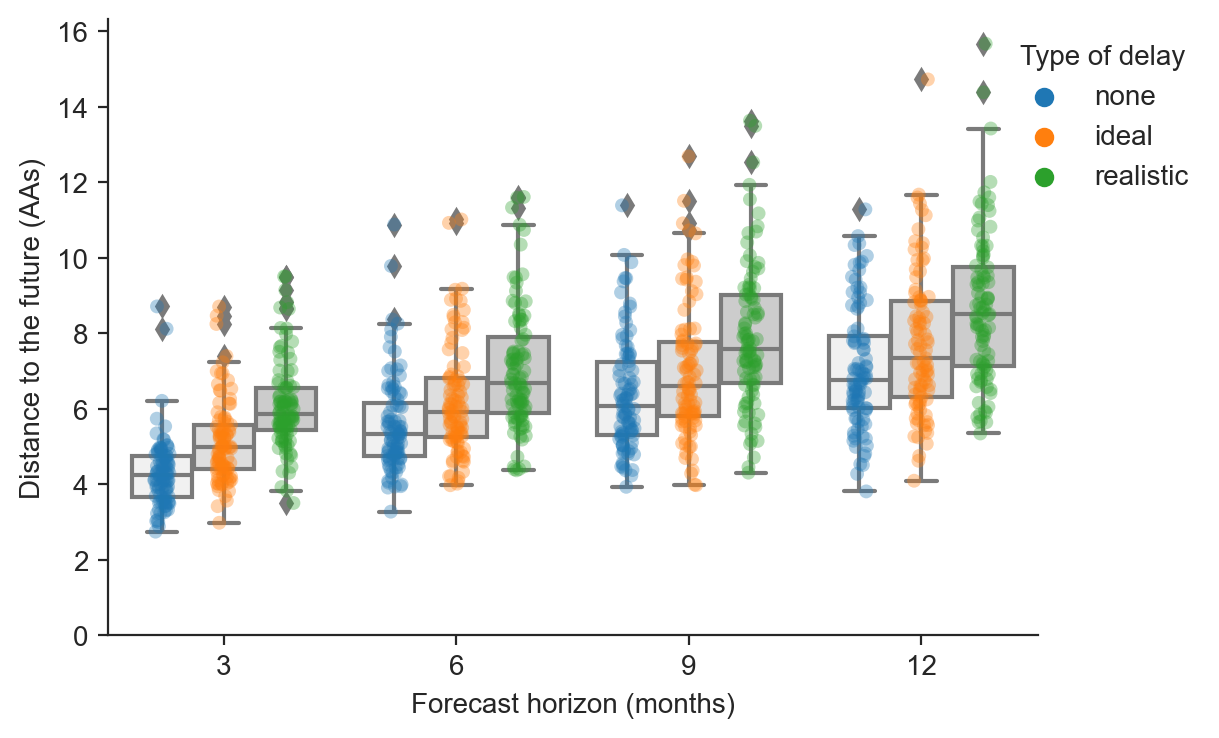

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
sns.boxplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    hue_order=("none", "ideal", "realistic"),
    data=simulated_distances,
    color="#CCCCCC",
    ax=ax,
)
sns.stripplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    data=simulated_distances,
    hue_order=("none", "ideal", "realistic"),
    alpha=0.35,
    ax=ax,
    dodge=True,
)

ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=labels[3:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)
ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Distance to the future (AAs)")

sns.despine()

In [23]:
status_quo_distances = simulated_distances.query("(delta_month == 12) & (delay_type == 'realistic')").loc[:, ["future_timepoint", "validation_error"]]

In [24]:
scenario_1_distances = distances.query("(delta_month == 6) & (delay_type == 'realistic')").loc[:, ["future_timepoint", "validation_error"]]
scenario_1_distances = scenario_1_distances.merge(
    status_quo_distances,
    on="future_timepoint",
    suffixes=["", "_current"]
)
scenario_1_distances["reduced_distance"] = scenario_1_distances["validation_error_current"] - scenario_1_distances["validation_error"]

In [25]:
scenario_1_distances.head()

,future_timepoint,validation_error,validation_error_current,reduced_distance
0,2017-10-01,6.111802,9.750042,3.638240
1,2017-10-01,6.212141,9.750042,3.537901
2,2018-01-01,5.726245,10.327899,4.601654
3,2018-01-01,6.227951,10.327899,4.099948
4,2018-04-01,5.815241,6.052542,0.237300


In [26]:
scenario_2_distances = distances.query("(delta_month == 12) & (delay_type == 'ideal')").loc[:, ["future_timepoint", "validation_error"]]
scenario_2_distances = scenario_2_distances.merge(
    status_quo_distances,
    on="future_timepoint",
    suffixes=["", "_current"]
)
scenario_2_distances["reduced_distance"] = scenario_2_distances["validation_error_current"] - scenario_2_distances["validation_error"]

In [27]:
scenario_3_distances = distances.query("(delta_month == 6) & (delay_type == 'ideal')").loc[:, ["future_timepoint", "validation_error"]]
scenario_3_distances = scenario_3_distances.merge(
    status_quo_distances,
    on="future_timepoint",
    suffixes=["", "_current"]
)
scenario_3_distances["reduced_distance"] = scenario_3_distances["validation_error_current"] - scenario_3_distances["validation_error"]

In [28]:
bins = np.arange(
    0,
    max([
        scenario_1_distances["reduced_distance"].max(),
        scenario_2_distances["reduced_distance"].max(),
        scenario_3_distances["reduced_distance"].max(),
    ]) + 1,
    0.5
)

In [29]:
bins

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])

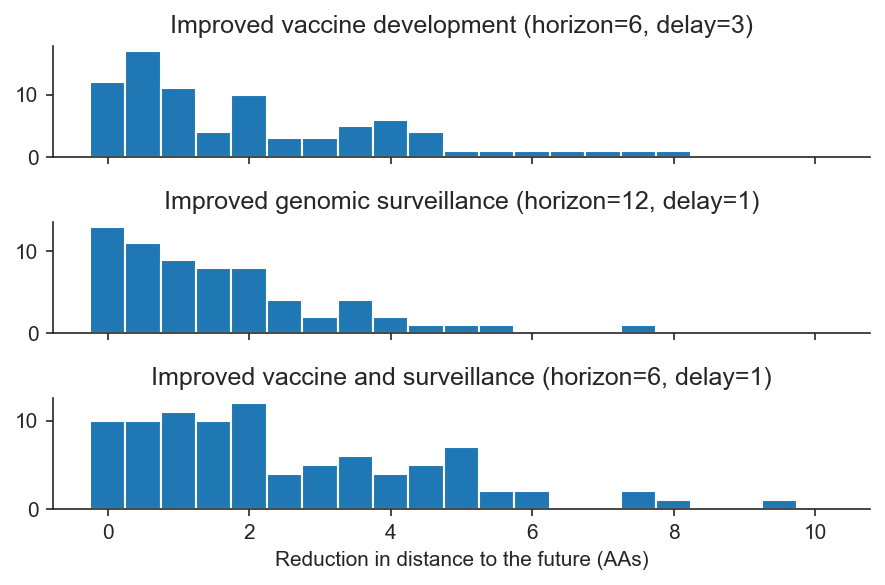

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(6, 4), dpi=150, sharex=True)
all_axes = axes.flatten()

ax1 = all_axes[0]
ax1.hist(
    scenario_1_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax1.set_title("Improved vaccine development (horizon=6, delay=3)")

ax2 = all_axes[1]
ax2.hist(
    scenario_2_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax2.set_title("Improved genomic surveillance (horizon=12, delay=1)")

ax3 = all_axes[2]
ax3.hist(
    scenario_3_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax3.set_xlabel("Reduction in distance to the future (AAs)")

ax3.set_title("Improved vaccine and surveillance (horizon=6, delay=1)")

plt.tight_layout()
sns.despine()

In [31]:
scenario_1_distances["reduced_distance"].mean()

1.60743065441356

In [32]:
scenario_2_distances["reduced_distance"].mean()

0.786386812434477

In [33]:
scenario_3_distances["reduced_distance"].mean()

2.3517144988564884

In [34]:
scenario_1_distances["reduced_distance"].mean() + scenario_2_distances["reduced_distance"].mean()

2.393817466848037

## Posterior predictive simulations

In [166]:
posterior = pd.read_csv("../results/simulation_posterior_predictive_simulations.csv")

In [172]:
delay_to_type = {
    0: "none",
    1: "ideal",
    3: "realistic",
}

In [173]:
posterior["delay_type"] = posterior["delay"].map(delay_to_type)

In [174]:
posterior

,horizon,delay,distance,delay_type
0,3,0,2.763884,none
1,3,0,3.835274,none
2,3,0,3.983803,none
3,3,0,2.527158,none
4,3,0,4.772132,none
...,...,...,...,...
11995,12,3,6.261557,realistic
11996,12,3,8.611417,realistic
11997,12,3,8.841626,realistic
11998,12,3,5.183078,realistic


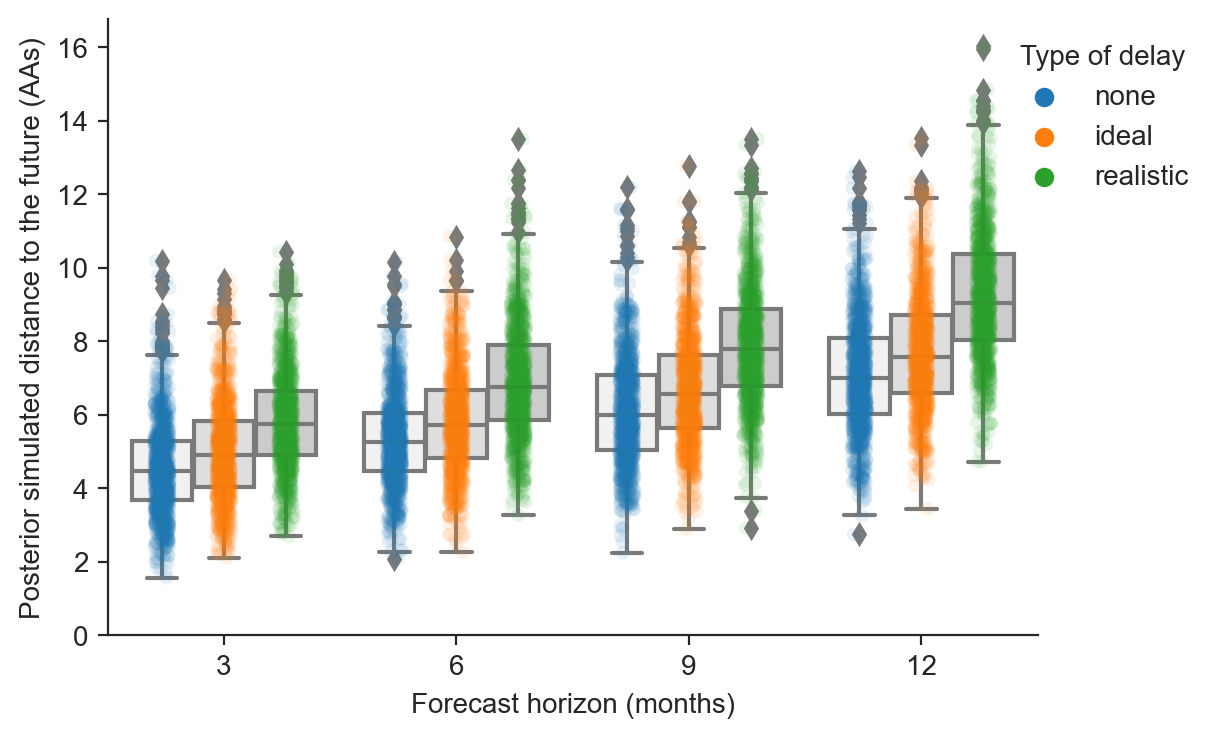

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
sns.boxplot(
    x="horizon",
    y="distance",
    hue="delay_type",
    hue_order=("none", "ideal", "realistic"),
    data=posterior,
    color="#CCCCCC",
    ax=ax,
)
sns.stripplot(
    x="horizon",
    y="distance",
    hue="delay_type",
    hue_order=("none", "ideal", "realistic"),
    data=posterior,
    alpha=0.1,
    ax=ax,
    dodge=True,
)

ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=labels[3:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)
ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Posterior simulated distance to the future (AAs)")

sns.despine()

## Relative improvements

In [176]:
improvements = pd.read_csv("../results/simulation_improvements.csv")

In [177]:
improvements

,id,scenario,improvement,title
0,1,"Improved vaccine development (6-month horizon,...",-0.963078,"Improved vaccine development (6-month horizon,..."
1,1,"Improved vaccine development (6-month horizon,...",0.009195,"Improved vaccine development (6-month horizon,..."
2,1,"Improved vaccine development (6-month horizon,...",3.314465,"Improved vaccine development (6-month horizon,..."
3,1,"Improved vaccine development (6-month horizon,...",5.003922,"Improved vaccine development (6-month horizon,..."
4,1,"Improved vaccine development (6-month horizon,...",3.631540,"Improved vaccine development (6-month horizon,..."
...,...,...,...,...
29995,3,Improved vaccine and surveillance (6-month hor...,5.634300,Improved vaccine and surveillance (6-month hor...
29996,3,Improved vaccine and surveillance (6-month hor...,1.169562,Improved vaccine and surveillance (6-month hor...
29997,3,Improved vaccine and surveillance (6-month hor...,6.519443,Improved vaccine and surveillance (6-month hor...
29998,3,Improved vaccine and surveillance (6-month hor...,5.708500,Improved vaccine and surveillance (6-month hor...


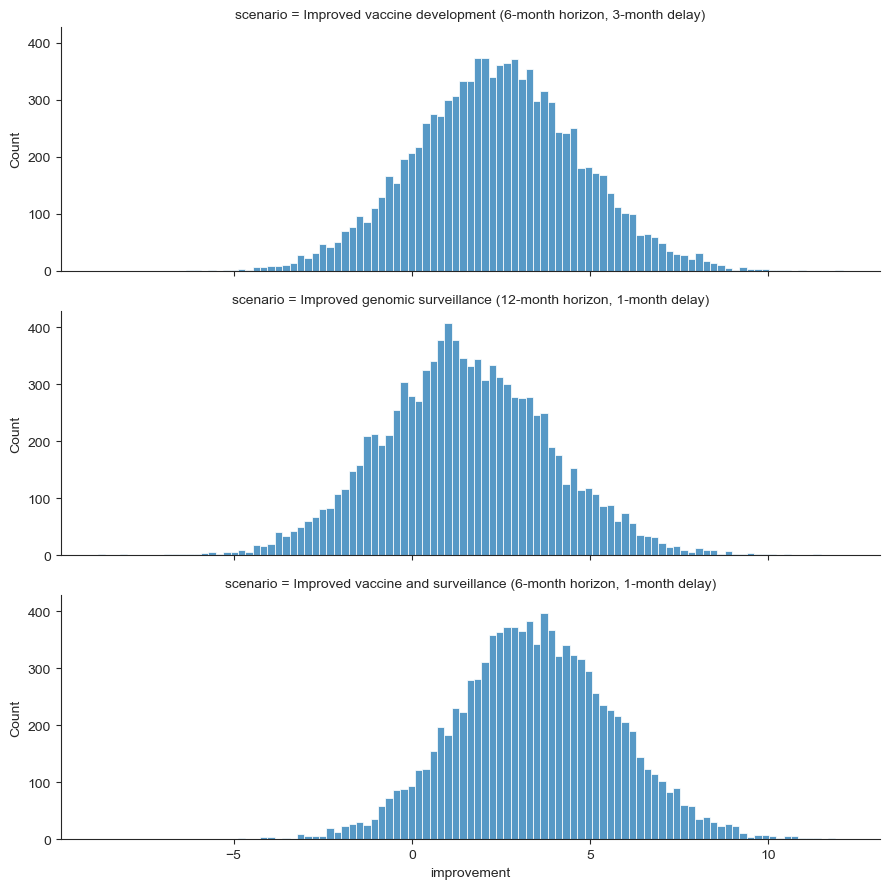

In [184]:
sns.displot(
    data=improvements,
    x="improvement",
    row="scenario",
    height=3,
    aspect=3
)

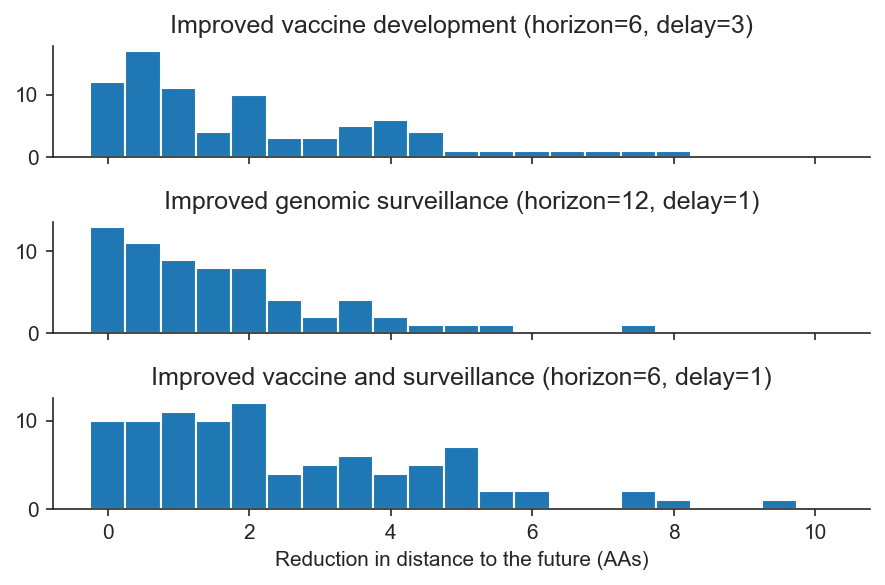

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(6, 4), dpi=150, sharex=True)
all_axes = axes.flatten()

ax1 = all_axes[0]
ax1.hist(
    scenario_1_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax1.set_title("Improved vaccine development (horizon=6, delay=3)")

ax2 = all_axes[1]
ax2.hist(
    scenario_2_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax2.set_title("Improved genomic surveillance (horizon=12, delay=1)")

ax3 = all_axes[2]
ax3.hist(
    scenario_3_distances["reduced_distance"],
    bins=bins,
    align="left",
)
ax3.set_xlabel("Reduction in distance to the future (AAs)")

ax3.set_title("Improved vaccine and surveillance (horizon=6, delay=1)")

plt.tight_layout()
sns.despine()

## Natural populations

In [11]:
natural_distances = distances[distances["sample"].str.contains("h3n2_")].copy()

In [12]:
natural_distances.shape

(390, 12)

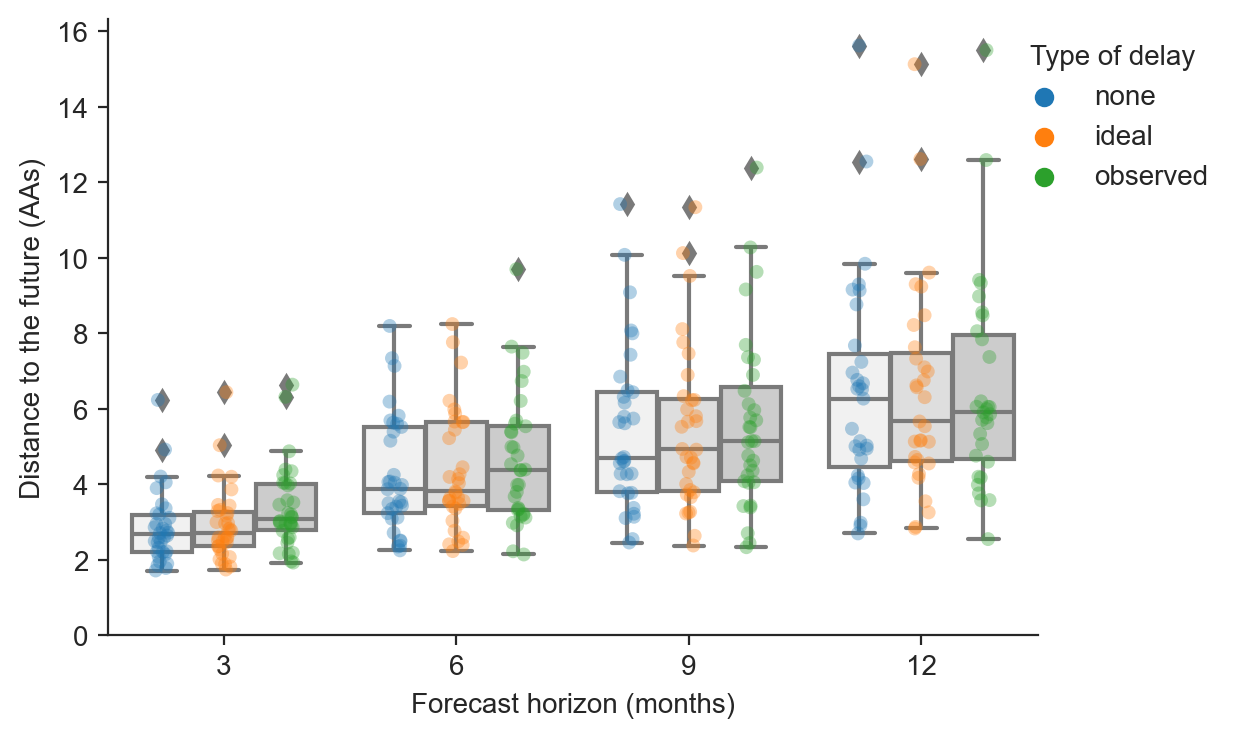

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
sns.boxplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    hue_order=("none", "ideal", "observed"),
    data=natural_distances,
    color="#CCCCCC",
    ax=ax,
)
sns.stripplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    data=natural_distances,
    hue_order=("none", "ideal", "observed"),
    alpha=0.35,
    ax=ax,
    dodge=True,
)

ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=labels[3:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)
ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Distance to the future (AAs)")

sns.despine()